In [1]:
import pandas as pd

# Importing the animals info datasets

In [2]:
# change for your local 
DFtraits = pd.read_csv('Data\\traits\\traits.csv', low_memory=False)
DFtraits

,eol_pk,page_id,resource_pk,resource_id,source,scientific_name,predicate,object_page_id,value_uri,normal_measurement,...,normal_units,measurement,units_uri,units,literal,method,remarks,sample_size,name_en,citation
0,fe7acdc0d78a4ed7c77879d027ff274d,47082222,NaN,459,http://www.marinespecies.org/aphia.php?p=taxde...,Quasiendothyra kobeitusana subsp. substricta C...,http://eol.org/schema/terms/ExtinctionStatus,NaN,http://eol.org/schema/terms/extinct,NaN,...,NaN,NaN,NaN,NaN,http://eol.org/schema/terms/extinct,NaN,NaN,NaN,NaN,NaN
1,fab9127661e3f3d3c45dd4df6062ebb9,47084979,NaN,459,http://www.marinespecies.org/aphia.php?p=taxde...,Fusulina pankouensis Lee 1927,http://eol.org/schema/terms/ExtinctionStatus,NaN,http://eol.org/schema/terms/extinct,NaN,...,NaN,NaN,NaN,NaN,http://eol.org/schema/terms/extinct,NaN,NaN,NaN,NaN,NaN
2,fe6a474681f31174ecd9e4cc4cd163c0,47102500,NaN,459,http://www.marinespecies.org/aphia.php?p=taxde...,Mesorbitolina texana (Roemer 1849),http://eol.org/schema/terms/ExtinctionStatus,NaN,http://eol.org/schema/terms/extinct,NaN,...,NaN,NaN,NaN,NaN,http://eol.org/schema/terms/extinct,NaN,NaN,NaN,NaN,NaN
3,fe7bcd411a7bcdade67cfff0985a4ed9,47094296,NaN,459,http://www.marinespecies.org/aphia.php?p=taxde...,Cibicidoides natlandi (Beck 1943),http://eol.org/schema/terms/ExtinctionStatus,NaN,http://eol.org/schema/terms/extinct,NaN,...,NaN,NaN,NaN,NaN,http://eol.org/schema/terms/extinct,NaN,NaN,NaN,NaN,NaN
4,fa9934eb8140d213f17e9f8ed42fc7f8,51315056,NaN,459,http://www.marinespecies.org/aphia.php?p=taxde...,Operculina subformai (Provale 1908),http://eol.org/schema/terms/ExtinctionStatus,NaN,http://eol.org/schema/terms/extinct,NaN,...,NaN,NaN,NaN,NaN,http://eol.org/schema/terms/extinct,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559734,R210-PK102152253,1045720,NaN,127,https://www.gbif.org/occurrence/map?taxon_key=...,<i>Anthophora plumipes</i>,http://eol.org/schema/terms/Present,NaN,http://www.geonames.org/2921044,NaN,...,NaN,NaN,NaN,NaN,http://www.geonames.org/2921044,NaN,NaN,188.0,NaN,NaN
3559735,R210-PK102153735,351068,NaN,127,https://www.gbif.org/occurrence/map?taxon_key=...,<i>Stenurella nigra</i>,http://eol.org/schema/terms/Present,NaN,http://www.geonames.org/2921044,NaN,...,NaN,NaN,NaN,NaN,http://www.geonames.org/2921044,NaN,NaN,151.0,NaN,NaN
3559736,R210-PK102153659,157427,NaN,127,https://www.gbif.org/occurrence/map?taxon_key=...,<i>Xylaria carpophila</i>,http://eol.org/schema/terms/Present,NaN,http://www.geonames.org/2921044,NaN,...,NaN,NaN,NaN,NaN,http://www.geonames.org/2921044,NaN,NaN,152.0,NaN,NaN
3559737,R210-PK102153363,351022,NaN,127,https://www.gbif.org/occurrence/map?taxon_key=...,<i>Agabus undulatus</i>,http://eol.org/schema/terms/Present,NaN,http://www.geonames.org/2921044,NaN,...,NaN,NaN,NaN,NaN,http://www.geonames.org/2921044,NaN,NaN,160.0,NaN,NaN


In [3]:
DFpages = pd.read_csv('Data\\traits\\pages.csv', low_memory=False)
DFpages

,page_id,parent_id,rank,canonical
0,60022422,45276842,NaN,NaN
1,60022135,45276777,NaN,NaN
2,55638825,35382,NaN,NaN
3,57948243,46548757,subfamily,Keratoisidinae
4,55635166,46559295,subspecies,Tursiops truncatus gephyreus
...,...,...,...,...
2404785,51878547,49862588,species,Mepraia breyeri
2404786,55695889,55695887,subspecies,Zelurus lugubris anduzei
2404787,51878549,51878548,species,Meccus bassolsae
2404788,51878551,51878550,species,Hermanlentia matsunoi


In [4]:
DFinferred = pd.read_csv('Data\\traits\\inferred.csv', low_memory=False)
DFinferred

,page_id,inferred_trait
0,60022422,R499-PK289647419
1,60022422,R1194-PK287629543
2,60022422,R898-PK284950667
3,60022422,R1009-PK203954558
4,60022135,R499-PK289647419
...,...,...
12077002,51878551,R1216-PK289514627
12077003,51878551,R1194-PK287629543
12077004,51878546,R1216-PK289513988
12077005,51878546,R1216-PK289514627


# Importing the animals positions datasets

Train Stats:
Number of species in train set:            500
Number of train locations:                 272037
Average number of locations per species:   544.074
Minimum number of locations for a species: 50
Maximum number of locations for a species: 2000

Displaying random species:
32861 - Trioceros deremensis


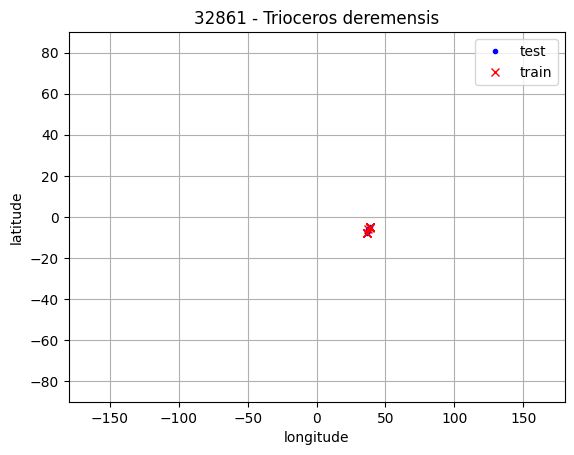

In [5]:
"""
Script demonstrating simple data loading and visualization.

Data Format: 
There are two files 'species_train.npz', and 'species_test.npz'
For the train data, we have the geographical coordinates where different 
species have been observed. This data has been collected by citizen scientists 
so it is noisy. 
For the test data, we have a set of locations for all species from the training, 
set and for each location we know if a species is present there or not. 

You can find out information about each species by appending the taxon_id to this 
URL, e.g. for 22956: 'Leptodactylus mystacinus', the URL is: 
https://www.inaturalist.org/taxa/22956
note some species might not be on the website anymore

Possible questions to explore: 
 - train a separate model to predict what locations a species of interest is present 
 - train a single model instead of per species model 
 - how to deal with "positive only data"
 - dealing with noisy/biased training data
 - using other input features e.g. climate data from  WorldClim Bioclimatic 
   variables  https://www.worldclim.org/data/worldclim21.html
 - how to evaluate e.g. what is a good metric to use?
 
Data sources:
 -  train data is from iNaturalist -  www.inaturalist.org
 -  test data is IUCN - https://www.iucnredlist.org/resources/spatial-data-download
"""


import numpy as np
import matplotlib.pyplot as plt

# loading training data    
data = np.load('Data\\species\\species_train.npz')
train_locs = data['train_locs']  # 2D array, rows are number of datapoints and 
                                 # columns are "latitude" and "longitude"
train_ids = data['train_ids']    # 1D array, entries are the ID of the species 
                                 # that is present at the corresponding location in train_locs
species = data['taxon_ids']      # list of species IDe. Note these do not necessarily start at 0 (or 1)
species_names = dict(zip(data['taxon_ids'], data['taxon_names']))  # latin names of species 

# loading test data 
data_test = np.load('Data\\species\\species_test.npz', allow_pickle=True)
test_locs = data_test['test_locs']    # 2D array, rows are number of datapoints 
                                      # and columns are "latitude" and "longitude"
# data_test['test_pos_inds'] is a list of lists, where each list corresponds to 
# the indices in test_locs where a given species is present, it can be assumed 
# that they are not present in the other locations 
test_pos_inds = dict(zip(data_test['taxon_ids'], data_test['test_pos_inds']))    

# data stats
print('Train Stats:')
print('Number of species in train set:           ', len(species))
print('Number of train locations:                ', train_locs.shape[0])
_, species_counts = np.unique(train_ids, return_counts=True)
print('Average number of locations per species:  ', species_counts.mean())
print('Minimum number of locations for a species:', species_counts.min())
print('Maximum number of locations for a species:', species_counts.max())


# plot train and test data for a random species
plt.close('all')
plt.figure(0)

sp = np.random.choice(species)
print('\nDisplaying random species:')
print(str(sp) + ' - ' + species_names[sp]) 

# get test locations and plot
# test_inds_pos is the locations where the selected species is present
# test_inds_neg is the locations where the selected species is not present
test_inds_pos = test_pos_inds[sp]  
test_inds_neg = np.setdiff1d(np.arange(test_locs.shape[0]), test_pos_inds[sp])
plt.plot(test_locs[test_inds_pos, 1], test_locs[test_inds_pos, 0], 'b.', label='test')

# get train locations and plot
train_inds_pos = np.where(train_ids == sp)[0]
plt.plot(train_locs[train_inds_pos, 1], train_locs[train_inds_pos, 0], 'rx', label='train')

plt.title(str(sp) + ' - ' + species_names[sp])
plt.grid(True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.legend()
plt.show()

# Checking the info and producing the train animals info DF

In [6]:
names_test = data_test['taxon_names']
names_train = data['taxon_names']
print(len(names_train)) # Number of animal species appearing in the train (and test) set
print(len(set(names_train) - set(DFpages['canonical']))) # Number of species in the train (and test) set not appearing into the online DB
print(set(names_test) - set(DFpages['canonical'])) # Names of the species in the train (and test) set not appearing into the online DB

500
14
{np.str_('Neophedina cincta'), np.str_('Neotamias canipes'), np.str_('Chrysuronia versicolor'), np.str_('Campocolinus coqui'), np.str_('Masticophis lateralis'), np.str_('Dasyprocta variegata'), np.str_('Neotamias rufus'), np.str_('Argya affinis'), np.str_('Argya striata'), np.str_('Riccordia ricordii'), np.str_('Curruca hortensis'), np.str_('Urile urile'), np.str_('Lanius corvinus'), np.str_('Psophocichla litsitsirupa')}


In [7]:
DFinferred_train = DFinferred[DFinferred['page_id'].isin(set(DFtraits[DFtraits['scientific_name'].isin(set(names_train))]['page_id']))]
DFinferred_train = pd.get_dummies(DFinferred_train, columns = ['inferred_trait']).groupby('page_id').sum()
print(len(DFinferred_train)) # Number of animals in the train (and test) set with at least one feature present in the DB
DFanimals_train = DFpages[DFpages['canonical'].isin(set(names_train))][['page_id','canonical']]
DFtraits_train = pd.merge(DFanimals_train, DFinferred_train, on='page_id', how='left')
DFtraits_train

382


,page_id,canonical,inferred_trait_R1011-PK203954796,inferred_trait_R1034-PK203961399,inferred_trait_R1050-PK291667466,inferred_trait_R1050-PK291667472,inferred_trait_R1051-PK291667493,inferred_trait_R1051-PK291667495,inferred_trait_R1051-PK291667497,inferred_trait_R1052-PK203961467,...,inferred_trait_R961-PK291670864,inferred_trait_R962-PK150614939,inferred_trait_R964-PK150614964,inferred_trait_R966-PK150615013,inferred_trait_R967-PK150614975,inferred_trait_R968-PK150614982,inferred_trait_R968-PK150614989,inferred_trait_R969-PK203960296,inferred_trait_R994-PK203953714,inferred_trait_R994-PK203953716
0,347435,Otospermophilus variegatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,337448,Afrixalus fornasini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,334471,Breviceps montanus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,336165,Anaxyrus quercicus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,332453,Scaphiopus couchii,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,49993742,Granatina granatina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
482,52571564,Spatula smithii,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
483,52232836,Cincloramphus cruralis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
484,52570273,Dispholidus typus,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
